In [1]:
# Machine Learning - Supervised Learning - Support Vector Machine (SVM)
# SVM is both Regression and Classification algorithm but predominantly
# used in classification.

# Objective of SVM algorithm is to draw a straight line also called as
# Maximum Margin Hyperplane that distinctly seperates both classes.
# 2 Support Vectors touching the observations closest to hyperplane
# are drawn. 

# Objective is to maximize the margin between both classes

# Left Side of Hyperplane is Negative Hyperplane
# Right Side of Hyperplane is Positive Hyperplane

# Support Vector Machines use Vector Arithmetic for calculations
# Dot product is used for calculating distance

# Non Linear SVM is where Straight Line cannot be drawn to seperate
# classes
# Linear SVM is where stright line can be drawn to seperate classes

# In SVM , Maximum Margin Hyperplane is a straightline.
# Convert Non Linear Data into Linear Data using Kernel functions
# or Kernel Tricks

# 2 widely used Kernel functions for transforming data is
# Polynomial Kernel & Gaussian Radial Basis Function Kernel(RBF)
# RBF Kernel is default in python

# Radial basis function kernel is a general purpose kernel. 
# It is used when we have no prior knowledge about the data. 
# It is also called as RBF kernel. 
# Gamma parameter of RBF controls the distance of influence of a 
# single training point. 
# And this is the default kernel in scikit-learn. 

# Widely used in Email Spam Classification, Image Classification,
# Anomaly Detection (Anomalies are like outliers)

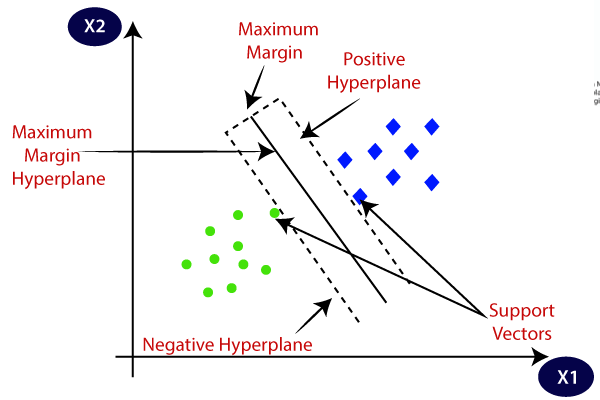
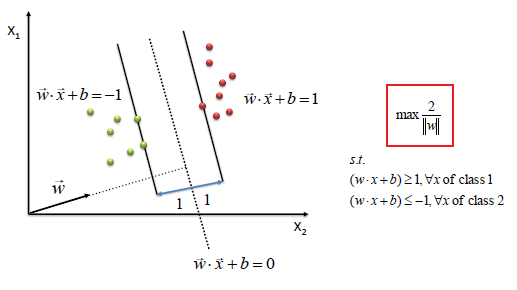

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Hackathon/H1N1 Vaccine Prediction'

/Users/rajeshprabhakarkaila/Desktop/Hackathon/H1N1 Vaccine Prediction


In [4]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [5]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [7]:
vaccinelabels=pd.read_csv("training_set_labels.csv")
# 2 Dependent Variables - seasonal_vaccine & h1n1_vaccine
# seasonal_vaccine - Balanced data
# h1n1_vaccine - Imabalanced Data

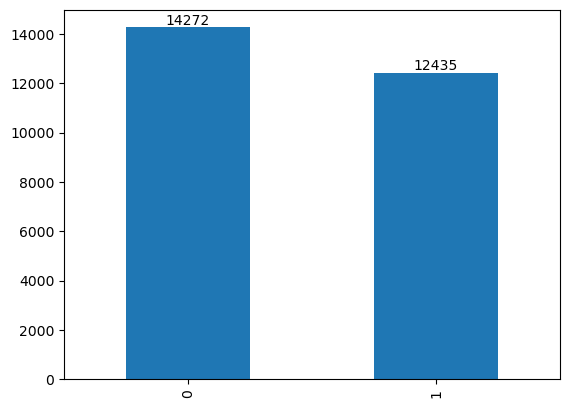

In [8]:
# seasonal_vaccine - Balanced data
ax=vaccinelabels.seasonal_vaccine.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

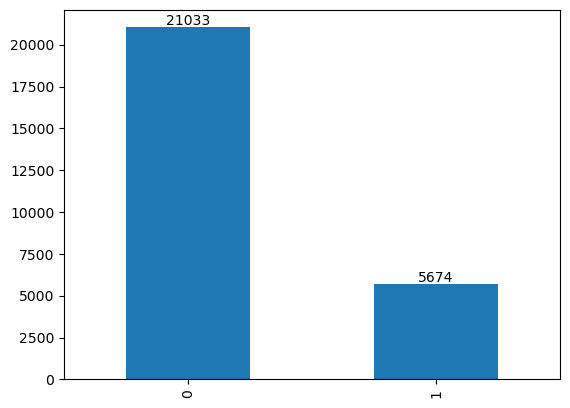

In [9]:
# h1n1_vaccine - Imbalanced data
ax=vaccinelabels.h1n1_vaccine.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [10]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [12]:
# Concatenate both dataframes for preprocessing
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [15]:
# Algorithm Based Missing Value Imputation - Considers impact of
# other variables on the missing value and imputes accordingly.
# MICE - Multivariate Imputation using Chained Equations
# Imputes both numeric and non numeric categorical variables

# Step 1 - Impute mising vales with mean (Numeric) & mode (categorical)
# Step 2 - Makes the Missing values variable as dependent variable
# and if missing value variable is
# Numeric - Regression Algorithm
# Non Numeric - Classiciation Algorithm
# Chained Equations is where missing values variable/column is
# treated as dependent variable and all other variables as independent
# variables and relevant regression/classification model is built.
# Step3 - Missing Values will be replaced by predicted value/class

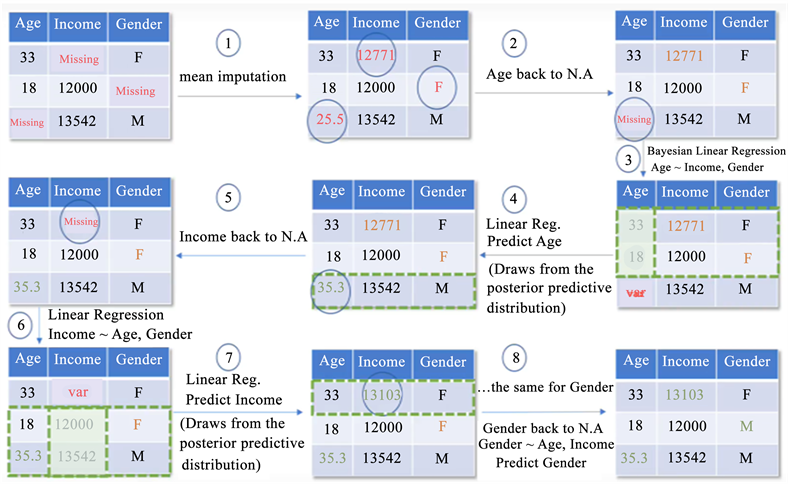

In [16]:
# In Python IterativeImputer in sklearn is experimental as of now
# IterativeImputer is similat to MICE algorithm
# Before implementing IterativeImputer
# 1) Drop irrelevant variables or columns
# 2) LabelEncode all object and categrocial data, but retain 
# missing values as missing. 

In [18]:
combinedf=combinedf.drop("respondent_id",axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
original=combinedf

In [21]:
mask=combinedf.isnull()

In [25]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [26]:
combinedf=combinedf.where(~mask,original)

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [31]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=50)

In [32]:
combinedf_impute=imputer.fit_transform(combinedf)

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [33]:
combinedf_impute=pd.DataFrame(combinedf_impute,
                              columns=combinedf.columns)

In [35]:
combinedf_impute.to_csv("vaccineimpute.csv")

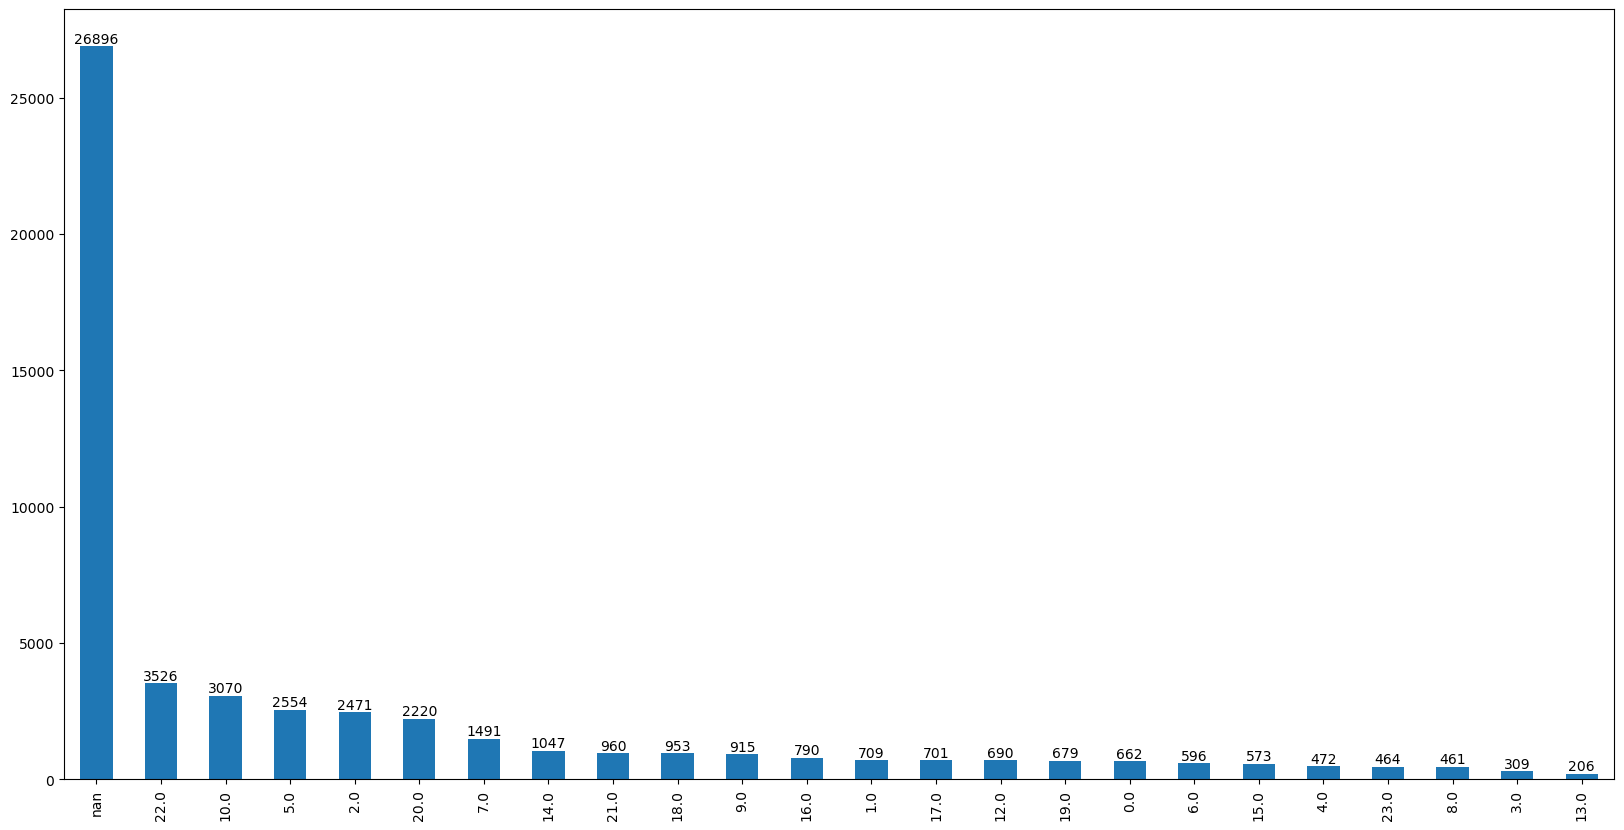

In [37]:
plt.figure(figsize=(20,10))
ax=combinedf.employment_occupation.value_counts(
    dropna=False).plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

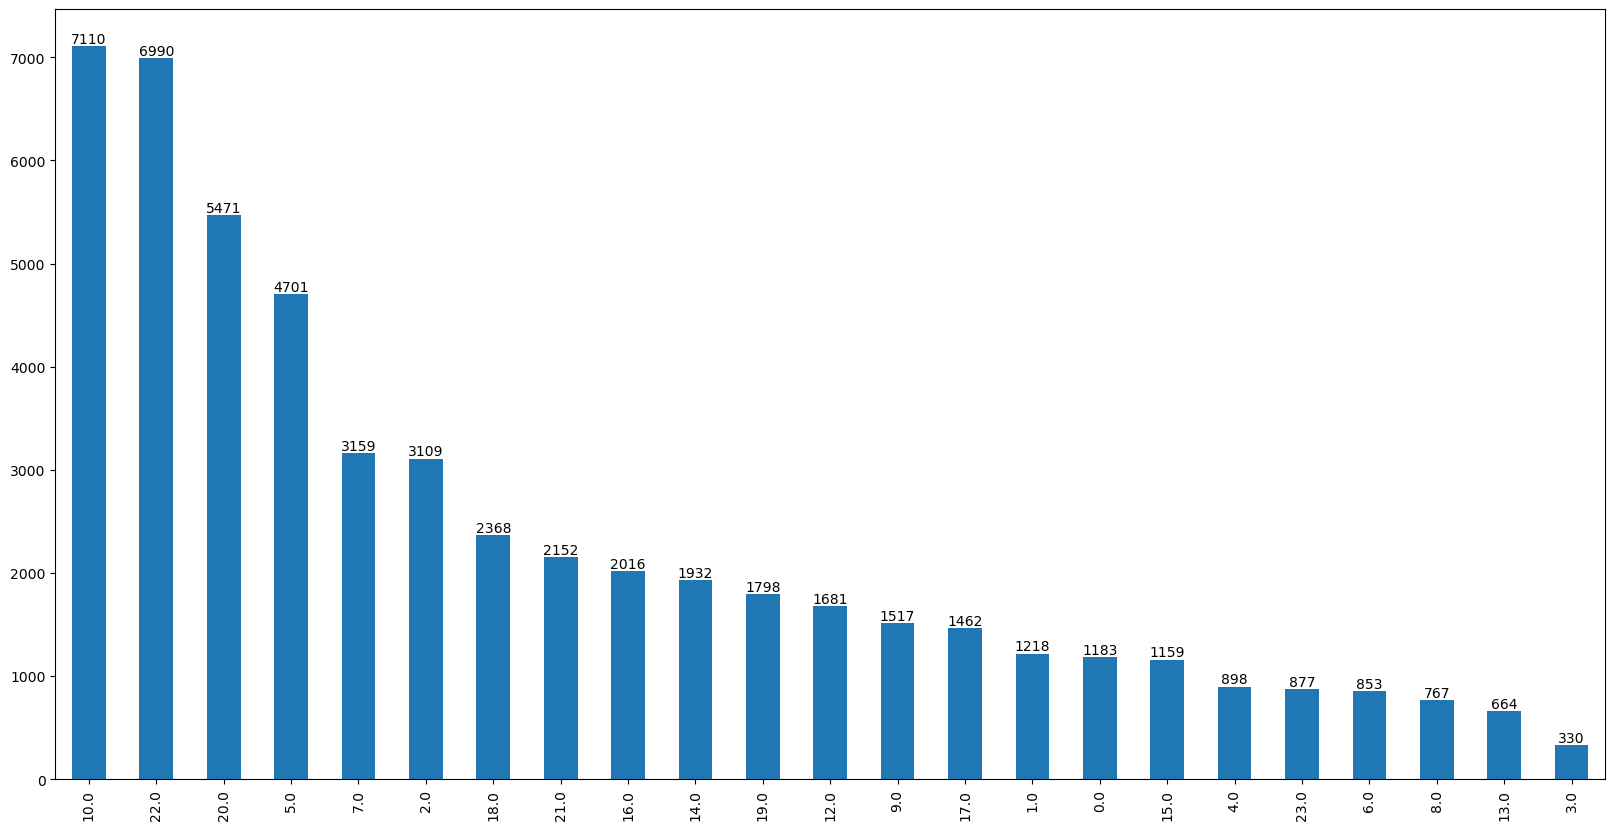

In [39]:
plt.figure(figsize=(20,10))
ax=combinedf_impute.employment_occupation.value_counts(
    dropna=False).plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [40]:
#split data back to train & test
vaccinetrain_df=combinedf_impute.loc[0:26706]
vaccinetest_df=combinedf_impute.loc[26707:53414]

In [41]:
print(vaccinetrain_df.shape)
print(vaccinetest_df.shape)

(26707, 35)
(26708, 35)


In [42]:
y=vaccinelabels.seasonal_vaccine
X=vaccinetrain_df

In [43]:
# Build the following Models, Score, Predict, Confusion Matrix
# Classification report,ROC Curve
# a) Binary Logistic Regression
# b) Decision Tree 
# c) Random Forest (500 trees)
# d) Gradient Boosting(500 trees)
# e) Naive Bayes
# f) Support Vector Machine

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [47]:
logit=LogisticRegression(max_iter=2000)

In [48]:
logitmodel=logit.fit(X,y)

In [49]:
logitmodel.score(X,y)

0.7733178567416782

In [50]:
logitpredict=logitmodel.predict(X)

In [51]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11517,2755
1,3299,9136


In [53]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



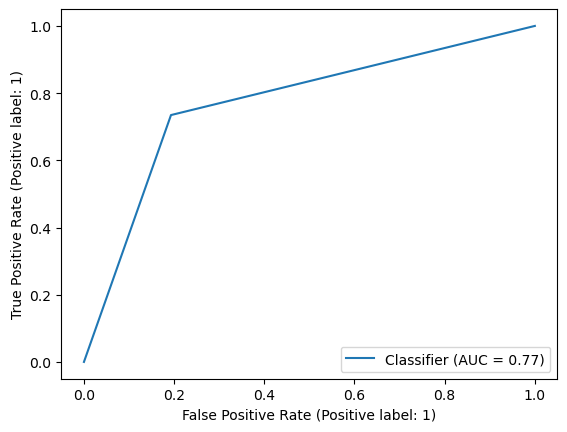

In [54]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [55]:
cross_val_score(logit,X,y)

array([0.76750281, 0.77143392, 0.7730762 , 0.77738251, 0.77176559])

In [56]:
np.mean([0.76750281, 0.77143392, 0.7730762 , 0.77738251, 0.77176559])

0.772232206

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
tree=DecisionTreeClassifier(max_depth=10)

In [69]:
treemodel=tree.fit(X,y)

In [70]:
treemodel.score(X,y)

0.8130078256636837

In [71]:
cross_val_score(tree,X,y)

array([0.74354174, 0.74223137, 0.74442988, 0.75173189, 0.74311927])

In [72]:
np.mean([0.74354174, 0.74223137, 0.74442988, 0.75173189, 
         0.74311927])

0.7450108299999998

In [73]:
treepredict=treemodel.predict(X)

In [74]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,12208,2064
1,2930,9505


In [75]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14272
           1       0.82      0.76      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



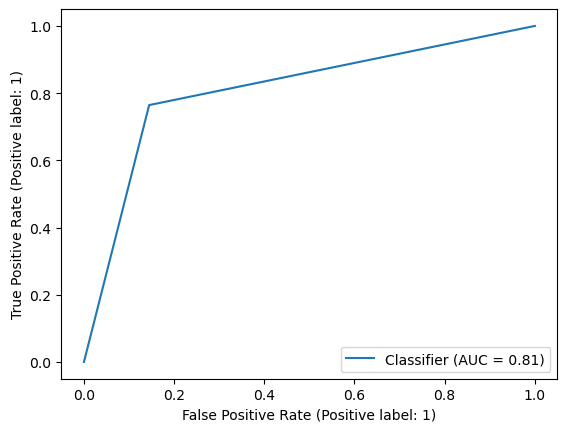

In [76]:
RocCurveDisplay.from_predictions(y,treepredict)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RF=RandomForestClassifier(n_estimators=1000,max_depth=10)

In [84]:
RFmodel=RF.fit(X,y)

In [85]:
RFmodel.score(X,y)

0.8237540719661512

In [86]:
cross_val_score(RF,X,y)

array([0.77162112, 0.77349307, 0.7785059 , 0.78019098, 0.7730762 ])

In [87]:
np.mean([0.77162112, 0.77349307, 0.7785059 , 0.78019098, 0.7730762 ])

0.775377454

In [88]:
RFpredict=RFmodel.predict(X)

In [89]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,12196,2076
1,2631,9804


In [90]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14272
           1       0.83      0.79      0.81     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.82      0.82     26707
weighted avg       0.82      0.82      0.82     26707



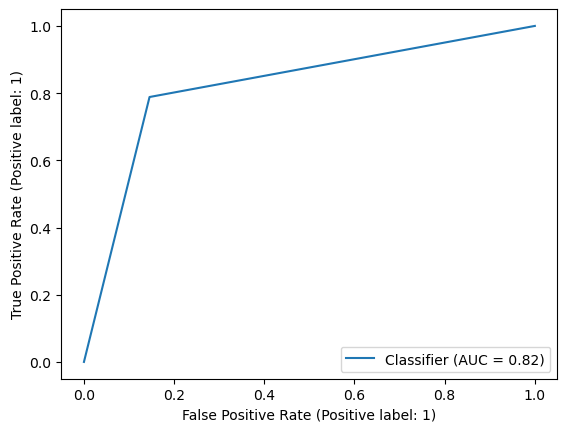

In [91]:
RocCurveDisplay.from_predictions(y,RFpredict)

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [97]:
gbmmodel=gbm.fit(X,y)

In [98]:
gbmmodel.score(X,y)

0.845096791103456

In [99]:
gbmpredict=gbmmodel.predict(X)

In [100]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12260,2012
1,2125,10310


In [101]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     14272
           1       0.84      0.83      0.83     12435

    accuracy                           0.85     26707
   macro avg       0.84      0.84      0.84     26707
weighted avg       0.85      0.85      0.85     26707



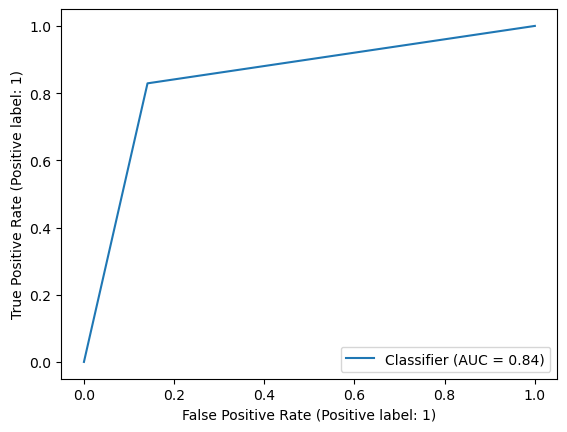

In [102]:
RocCurveDisplay.from_predictions(y,gbmpredict)

In [107]:
from sklearn.naive_bayes import CategoricalNB

In [108]:
nb=CategoricalNB()

In [109]:
nbmodel=nb.fit(X,y)

In [110]:
nbmodel.score(X,y)

0.7547085033886247

In [111]:
nbpredict=nbmodel.predict(X)

In [112]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,10972,3300
1,3251,9184


In [113]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.74      0.74      0.74     12435

    accuracy                           0.75     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.75      0.75      0.75     26707



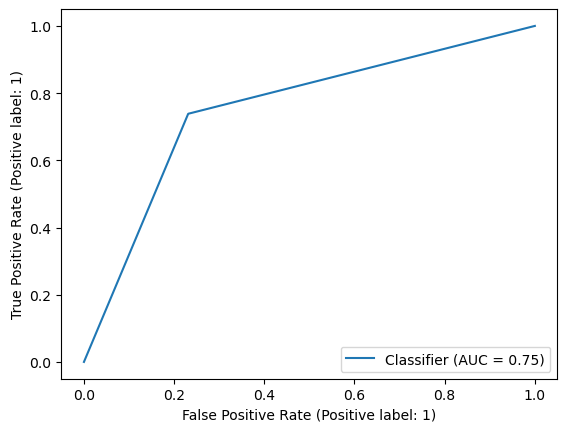

In [114]:
RocCurveDisplay.from_predictions(y,nbpredict)

In [128]:
from sklearn.svm import SVC

In [132]:
svm=SVC(C=3)

In [133]:
svmmodel=svm.fit(X,y)

In [134]:
svmmodel.score(X,y)

0.7839892163103306

In [135]:
svmpredict=svmmodel.predict(X)

In [136]:
pd.crosstab(y,svmpredict)

col_0,0,1
seasonal_vaccine,,
0,11688,2584
1,3185,9250


In [137]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     14272
           1       0.78      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



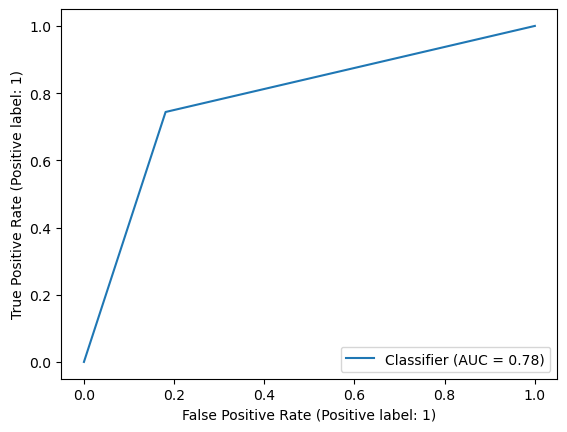

In [138]:
RocCurveDisplay.from_predictions(y,svmpredict)

In [139]:
vaccinetrain_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [140]:
# EDA using vaccinetrain_df
# Pie Diagrams - sex, education, marital_status,health_insurance
# Stacked Bar Plots - h1n1_concern & sex, h1n1knowledge & race
# health_insurance & employment_status, health_worker & h1n1knowledge

# Hypothesis Testing
# Test Null No Association between seasonal_vaccine & h1n1concern
# Test Null No Association between seasonal_vaccine & h1n1knowledge
# Test Null No Association between seasonal_vaccine & health_worker
# Test Null No Association between seasonal_vaccine & sex
# Test Null No Association between seasonal_vaccine & employment_status
# Test Null No Association between seasonal_vaccine & education